<a href="https://colab.research.google.com/github/enesdemirag/cifar10-classification/blob/main/cifar10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dependencies
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime as dt
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy, AUC
from tensorflow.keras.datasets import cifar10
%matplotlib inline

In [2]:
# Class labels
classes = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

In [3]:
# MLP Model
class MLP(object):
    def __init__(self):
        self.model = Sequential(name="NaN")

        self.model.add(Flatten(input_shape=(32, 32, 3)))
        self.model.add(Dense(units=256, activation="relu"))
        self.model.add(Dropout(0.10))
        self.model.add(Dense(units=128, activation="relu"))
        self.model.add(Dropout(0.10))
        self.model.add(Dense(units=10,  activation="softmax"))

        self.model.compile(
            optimizer = RMSprop(learning_rate=0.0001),
            loss      = CategoricalCrossentropy(),
            metrics   = [Precision(), Recall(), CategoricalAccuracy(), AUC()]
        )

    def train(self, features, labels, batch_size=32, epochs=100, shuffle=True):
        history     = self.model.fit(features, labels, batch_size, epochs, shuffle=shuffle, verbose=1)
        self.epochs = history.epoch
        self.hist   = pd.DataFrame(history.history)
        return self.epochs, self.hist

    def test(self, features, labels):
        self.loss, self.presicion, self.recall, self.accuracy, self.auc = self.model.evaluate(features, labels, verbose=0)
        return self.loss, self.presicion, self.recall, self.accuracy, self.auc

    def predict(self, img):
        return self.model.predict(img)
    
    def save(self, path="./saved_models/"):
        timestamp = dt.timestamp(dt.now())
        filename = path + "MLP_" + str(timestamp)
        
        plot_model(self.model, to_file=filename + ".png", show_shapes=True, show_layer_names=True)
        self.model.save(filename + ".h5")
    
    def summary(self):
        return self.model.summary()

In [4]:
# Dataset
def prepare_data():
    (images_train, labels_train), (images_test, labels_test) = cifar10.load_data()
    
    # normalize the pixel values
    images_train  = images_train.astype('float32')
    images_test   = images_test.astype('float32')
    images_train /= 255
    images_test  /= 255

    # one hot encoding
    labels_train = to_categorical(labels_train, 10)
    labels_test  = to_categorical(labels_test, 10)
    
    return images_train, labels_train, images_test, labels_test

In [5]:
# Preprocessing
images_train, labels_train, images_test, labels_test = prepare_data()

In [6]:
# Creating model
model = MLP()
model.summary()

Model: "NaN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________

In [7]:
# Training MLP Model
epochs, hist = model.train(images_train, labels_train)

Epoch 1/100
1563/1563 [==============================] - 8s 4ms/step - loss: 2.0184 - precision: 0.5351 - recall: 0.0274 - categorical_accuracy: 0.2652 - auc: 0.7252
Epoch 2/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7657 - precision: 0.6135 - recall: 0.1001 - categorical_accuracy: 0.3682 - auc: 0.8107
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6911 - precision: 0.6199 - recall: 0.1377 - categorical_accuracy: 0.3960 - auc: 0.8293
Epoch 4/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6300 - precision: 0.6474 - recall: 0.1730 - categorical_accuracy: 0.4171 - auc: 0.8430
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5920 - precision: 0.6638 - recall: 0.1938 - categorical_accuracy: 0.4326 - auc: 0.8509
Epoch 6/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5520 - precision: 0.6657 - recall: 0.2147 - categorical_accuracy: 0.4462 - auc: 0.8590
Epoc

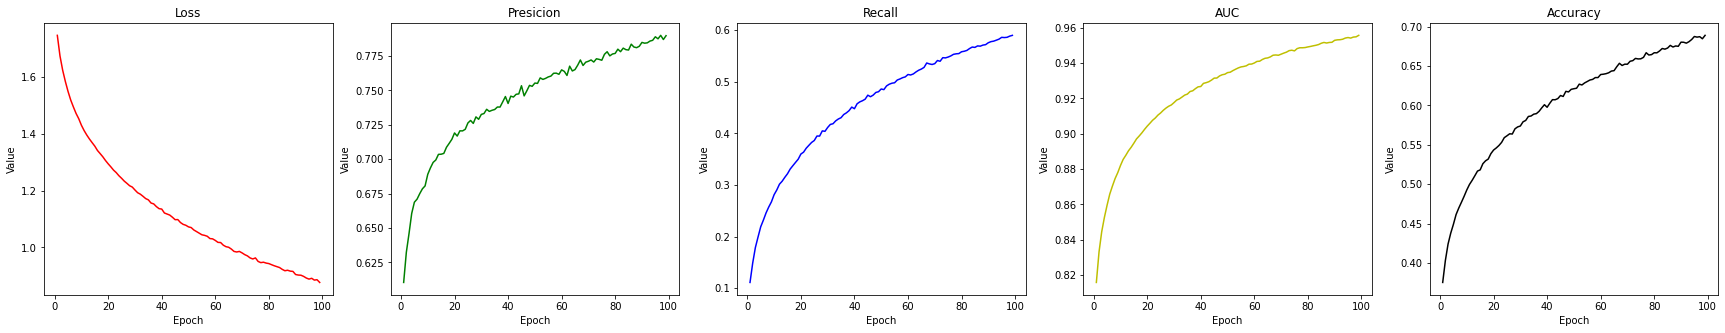

In [8]:
# Plotting the training metrics
fig, ax = plt.subplots(1, 5, figsize=(30, 5))

ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Value")
ax[0].set_title("Loss")

ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Value")
ax[1].set_title("Presicion")

ax[2].set_xlabel("Epoch")
ax[2].set_ylabel("Value")
ax[2].set_title("Recall")

ax[3].set_xlabel("Epoch")
ax[3].set_ylabel("Value")
ax[3].set_title("AUC")

ax[4].set_xlabel("Epoch")
ax[4].set_ylabel("Value")
ax[4].set_title("Accuracy")

ax[0].plot(epochs[1:], hist["loss"][1:], color="r")
ax[1].plot(epochs[1:], hist["precision"][1:], color="g")
ax[2].plot(epochs[1:], hist["recall"][1:], color="b")
ax[3].plot(epochs[1:], hist["auc"][1:], color="y")
ax[4].plot(epochs[1:], hist["categorical_accuracy"][1:], color="k")

In [9]:
# Testing MLP Model
loss, precision, recall, accuracy, auc = model.test(images_test, labels_test)

print("--- Test Results ---")
print("%-10s: %f" %("Loss", loss))
print("%-10s: %f" %("Precision", precision))
print("%-10s: %f" %("Recall", recall))
print("%-10s: %f" %("AUC", auc))
print("%-10s: %f" %("Accuracy", accuracy))

--- Test Results ---
Loss      : 1.534274
Precision : 0.632662
Recall    : 0.414900
AUC       : 0.884018
Accuracy  : 0.525400


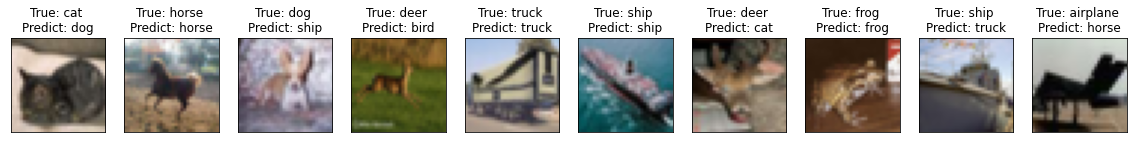

In [10]:
# Prediction MLP Model	
fig, ax = plt.subplots(1, 10, figsize=(20, 5))

for i in range(10):
    rand_sample = random.randint(0, 1000)
    img = images_test[rand_sample].reshape((1, 32, 32, 3))	
    y_orig = labels_test[rand_sample]
    y_pred = model.predict(img)

    y_orig = list(y_orig).index(1)
    y_pred = [1 if i == max(y_pred[0]) else 0 for i in y_pred[0]].index(1)
    
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(img[0])	
    ax[i].set_title("True: %s \nPredict: %s" % (classes[y_orig], classes[y_pred]))	